In [1]:
# Dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# Save file path to variable
sales = "GameSales.csv"

In [4]:
# Read with Pandas
sales_pd = pd.read_csv(sales)
sales_pd.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [6]:
sales_pd.fillna(0,inplace=True)
pkmon_platforms = ["3DS","DS","G","GBA","N64"]
filter1 = sales_pd["Platform"].isin(pkmon_platforms)
sales_plat_pd = sales_pd[filter1]
sales_plat_pd.reset_index(drop=True)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0.0,0.0,0
1,Tetris,G,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,0.0,0.0,0.0,0.0,0
2,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
3,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,0.0,0.0,0.0,0.0,0
4,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.48,4.13,1.90,23.22,91.0,64.0,8.6,465.0,E
5,Pokemon Gold/Pokemon Silver,G,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,0.0,0.0,0.0,0.0,0
6,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.74,9.20,4.16,2.04,20.15,77.0,58.0,7.9,50.0,E
7,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.38,4.46,6.04,1.36,18.25,0.0,0.0,0.0,0.0,0
8,Super Mario Land,G,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,0.0,0.0,0.0,0.0,0
9,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,0.0,0.0,0.0,0.0,0


In [7]:
sales_plat_pd.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0.0,0.0,0
5,Tetris,G,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,0.0,0.0,0.0,0.0,0
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,8.5,433.0,E
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,0.0,0.0,0.0,0.0,0
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.48,4.13,1.90,23.22,91.0,64.0,8.6,465.0,E


In [8]:
# Dropping Ratings and Critic Score
Allsales = sales_plat_pd[["Name", "Platform", "Year_of_Release",
                           "Genre", "Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
Allsales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,G,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.48,4.13,1.90,23.22


In [9]:
# Melt DataFrame
melted_df = pd.melt(Allsales, 
                    id_vars=["Name", "Platform", "Year_of_Release","Genre","Publisher"],
                    var_name="Sales")
melted_df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,Sales,value
20320,Tetsudou Seminar: Oote Shitetsuhen,DS,2009.0,Simulation,Taito,Global_Sales,0.01
20321,theta,DS,2007.0,Puzzle,Nintendo,Global_Sales,0.01
20322,Nintama Rantarou: Nintama no Tame no Ninjutsu ...,DS,2009.0,Puzzle,Russel,Global_Sales,0.01
20323,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007.0,Adventure,Majesco Entertainment,Global_Sales,0.01
20324,Fashion Designer: Style Icon,DS,2007.0,Simulation,505 Games,Global_Sales,0.01


In [10]:
poke_sales=melted_df[melted_df['Name'].str.contains('Pokemon')]
poke_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Sales,value
0,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,NA_Sales,11.27
5,Pokemon Gold/Pokemon Silver,G,1999.0,Role-Playing,Nintendo,NA_Sales,9.00
7,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,NA_Sales,6.38
9,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,NA_Sales,6.06
11,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,NA_Sales,5.51


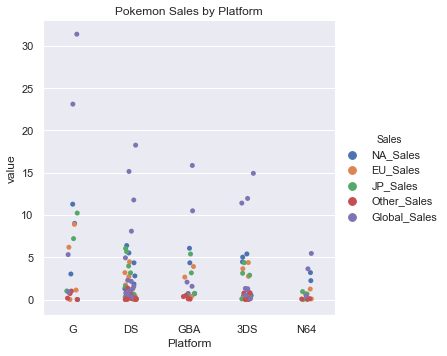

In [11]:
sns.catplot(x="Platform", y="value", hue="Sales", data=poke_sales);
plt.title("Pokemon Sales by Platform")
plt.savefig("PokeSales_Scatter.png")

In [12]:
print(poke_sales.describe(include=['object']))

                                              Name Platform         Genre  \
count                                          160      160           160   
unique                                          32        5             7   
top     Pokemon Mystery Dungeon: Gates to Infinity       DS  Role-Playing   
freq                                             5       65            95   

       Publisher         Sales  
count        160           160  
unique         1             5  
top     Nintendo  Global_Sales  
freq         160            32  


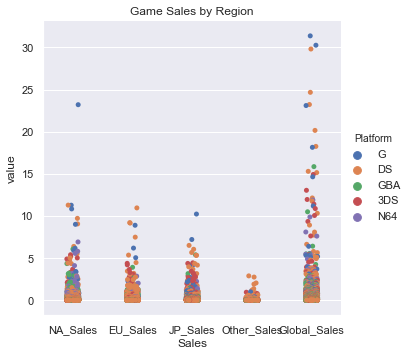

In [13]:
sns.catplot(x="Sales", y="value", hue="Platform", data=melted_df);
plt.title("Game Sales by Region")
plt.savefig("All_Sales_Scatter.png")

In [14]:
print(melted_df.describe(include=['object']))

                Name Platform   Genre Publisher     Sales
count          20325    20325   20325     20325     20325
unique          3963        5      12       265         5
top     Mario Tennis       DS  Action  Nintendo  EU_Sales
freq              15    11255    3830      2295      4065


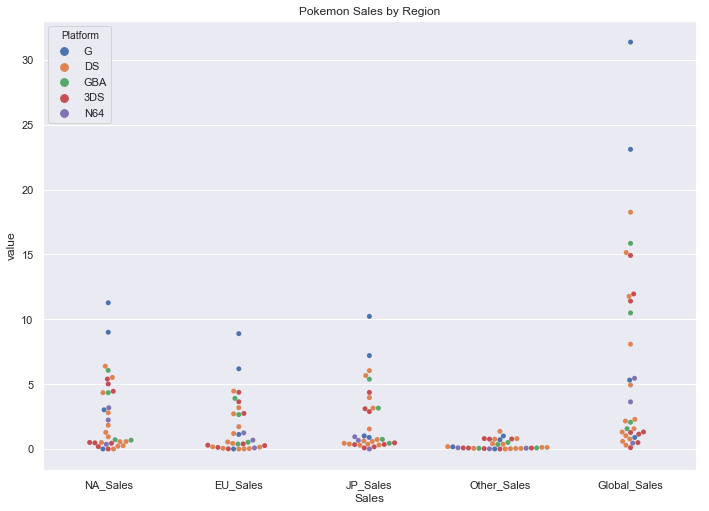

In [15]:
#Code to produce swamplot:
##########
# # "Melt" the dataset to "long-form" or "tidy" representation
# swarmpt = pd.melt(Allsales, id_vars=["Platform"], value_vars=["NA_Sales"] ,var_name="NA_Sales_values")
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="Sales", y="value", hue="Platform",
              data=poke_sales)
#############################
plt.title("Pokemon Sales by Region")
plt.savefig("poke_swarm.png")

In [16]:
print(poke_sales.describe(include=['object']))

                                              Name Platform         Genre  \
count                                          160      160           160   
unique                                          32        5             7   
top     Pokemon Mystery Dungeon: Gates to Infinity       DS  Role-Playing   
freq                                             5       65            95   

       Publisher         Sales  
count        160           160  
unique         1             5  
top     Nintendo  Global_Sales  
freq         160            32  


In [ ]:
#Code to produce swamplot:
##########
# "Melt" the dataset to "long-form" or "tidy" representation
# swarmpt = pd.melt(Allsales, id_vars=["Platform"], value_vars=["Global_Sales"] ,var_name="Global_Sales_values")
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="Sales", y="value", hue="Platform",
              data=melted_df)
#############################
plt.title("Game Sales by Region")
plt.savefig("gamesSwarm.png")

In [ ]:
sns.boxplot(x="Sales", y="value",
            hue="Platform",
            data=melted_df)
plt.title("Game Sales by Region")
plt.savefig("gameBoxplot.png")

In [ ]:
sns.boxplot(x="Sales", y="value",
            hue="Platform",
            data=poke_sales)
plt.title("Pokemon by Region")
plt.savefig("PokeBoxplot.png")